In [1]:
library(tidyverse)
library(patchwork)

theme_custom <- theme_classic() +
                theme(## Axis labels
                      axis.text.y  = element_text(size=16, face="bold", color="#333333"),
                      axis.text.x  = element_text(size=20, color="#333333"),
                      ## Title, subtitle, caption, legend
                      plot.title   = element_text(size=26, face="bold", color="#333333"),
                      plot.subtitle = element_text(size=23, color="#333333"),
                      plot.caption = element_text(size=12, face="bold", colour="#333333", hjust=0),
                      legend.position = "top",
                      legend.text = element_text(size=15, hjust=0, vjust=.1),
                      legend.title = element_blank(),
                      ## axis lines
                      panel.grid.major.y = element_line(color="#6F8793"),
                      axis.ticks.y = element_blank(),
                      axis.ticks.x = element_blank(),
                     )
                     
figsize <- function(width=22, heigth=8){
    options(repr.plot.width=width, repr.plot.height=heigth)
}
figsize()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
classifier_configuration <- c("1 Hidden Layer", "2 Hidden Layers", "3 Hidden Layers", "4 Hidden Layers", "5 Hidden Layers")
best_validation_accuracy <- c(0.82329, 0.84039, 0.83795, 0.83225, 0.83550)
convergence_epoch <- c(12, 7, 7, 7, 7)

df <- data.frame(
    config = classifier_configuration,
    best_val_acc = best_validation_accuracy,
    conv_epoch = convergence_epoch
)

df

config,best_val_acc,conv_epoch
<chr>,<dbl>,<dbl>
1 Hidden Layer,0.82329,12
2 Hidden Layers,0.84039,7
3 Hidden Layers,0.83795,7
4 Hidden Layers,0.83225,7
5 Hidden Layers,0.83550,7


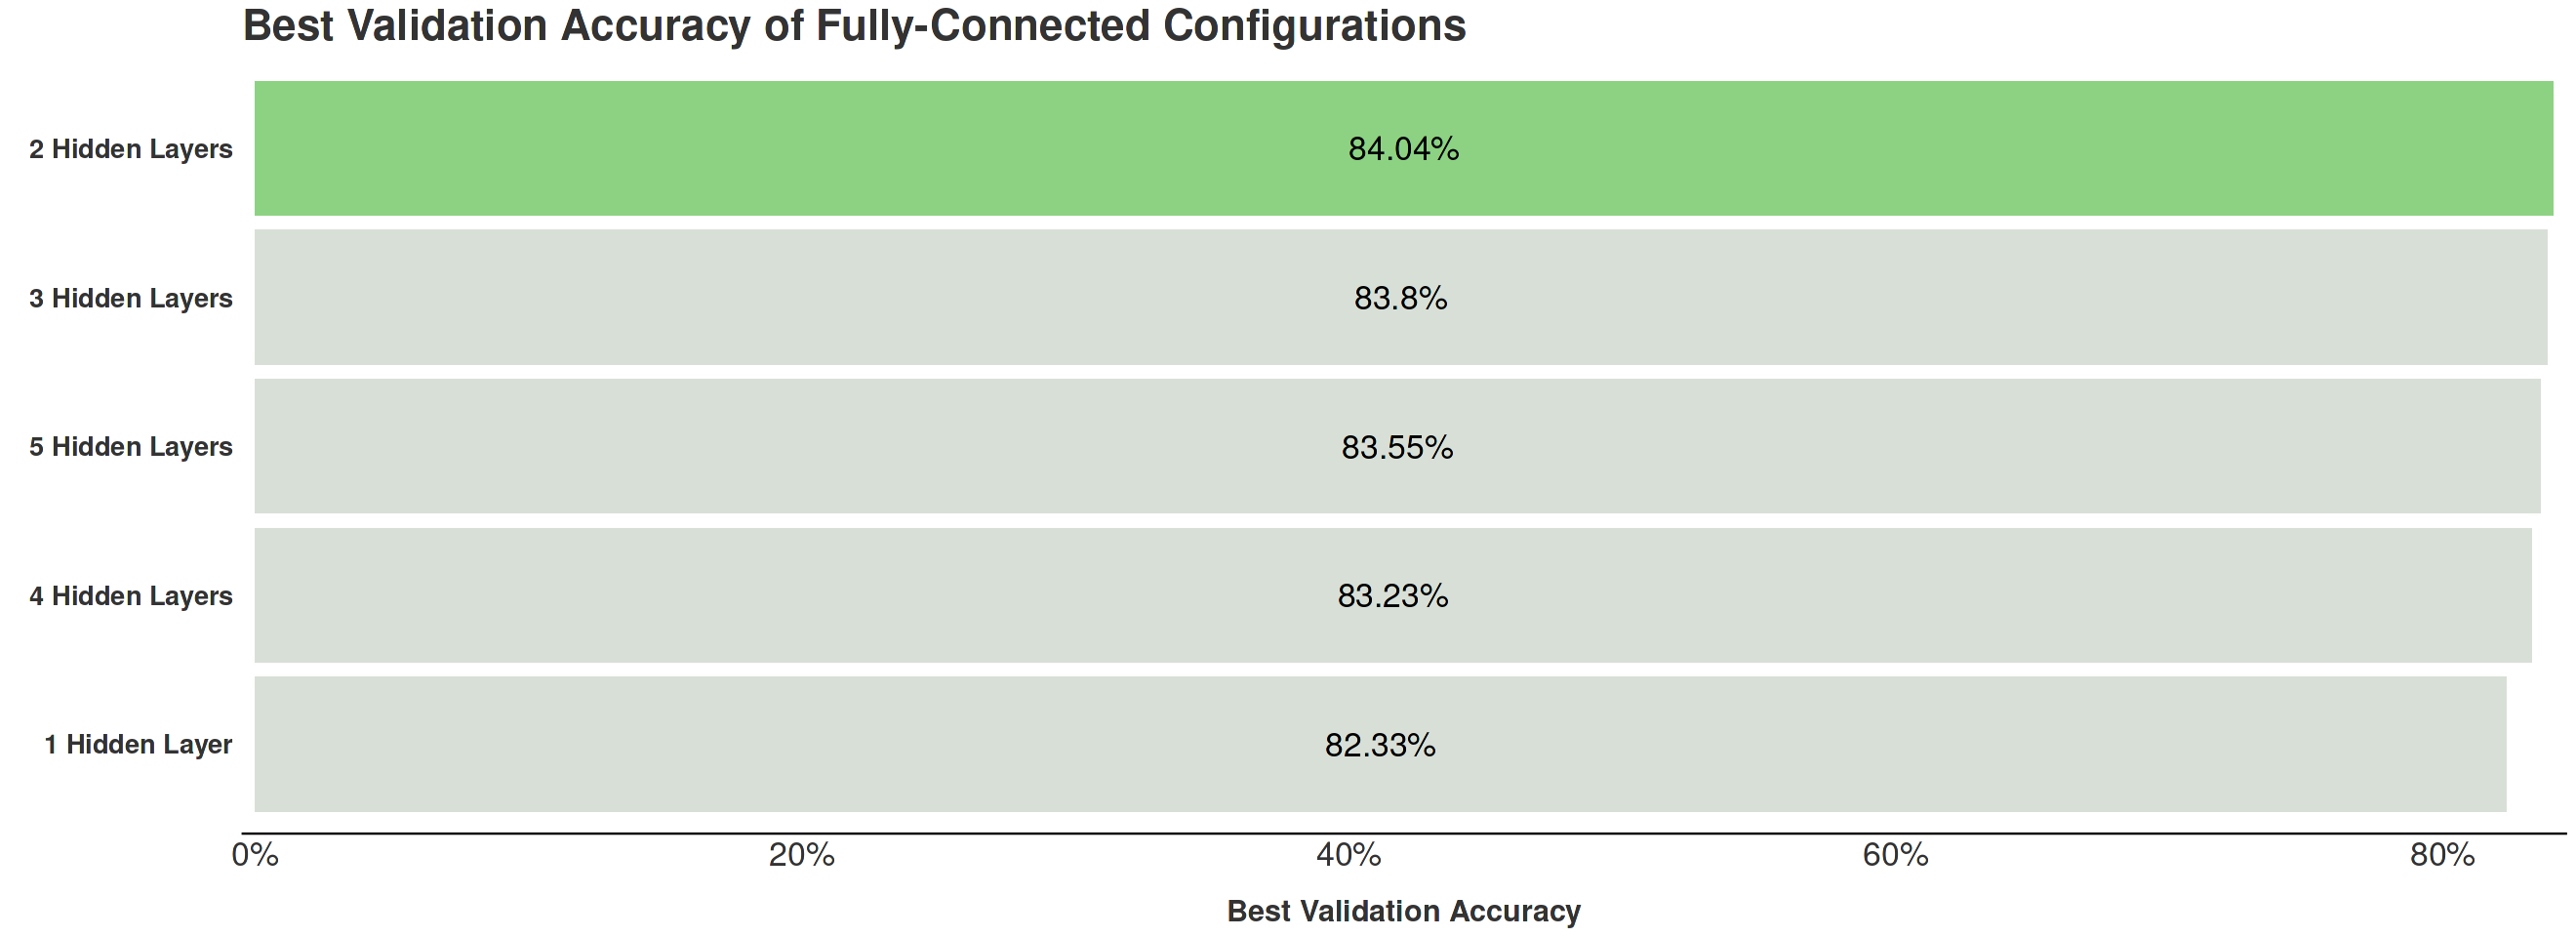

In [3]:
df %>%
    mutate(fill_indicator=c("0", "1", "0", "0", "0")) %>%
    mutate(config = fct_reorder(config, best_val_acc)) %>%
    ggplot(aes(y = config, x = best_val_acc, fill=fill_indicator)) +
    geom_bar(stat = "identity") +
    labs(title = "Best Validation Accuracy of Fully-Connected Configurations",
         x = "Best Validation Accuracy",
         y=""
        ) +
    geom_text(aes(label = paste(round(best_val_acc * 100, 2), "%", sep="")), 
            position = position_stack(vjust = 0.5), 
            size = 7) +
    theme_custom +
    scale_x_continuous(expand = c(0.0, .005), labels = scales::percent) + 
    theme(panel.grid.major.y = element_blank(),
          axis.line.y = element_blank(),
          axis.title.x = element_text(size = 18, face="bold", colour="#333333", margin = margin(t = 16)),
          legend.position="none"
    ) +
    scale_fill_manual(
        values=c("1"="#8cd282",
                 "0"="#d8dfd7"
                )
    )